In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *
import matplotlib as mlib
from scipy import stats

In [2]:
mlib.rcParams.update({'font.size': 22})
mlib.rcParams.update({'errorbar.capsize': 3})

In [3]:
data = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/batch_analysis_150724_02012018.npz")
print data['recording_archive_name']
metadata = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/batch_e242f69a4e27d7e68115466749a63566.npz")
print 'Total time taken for simulations:', metadata['total_time']

../synaptogenesis/e242f69a4e27d7e68115466749a63566/case3_run9_@e242f69a4e27d7e68115466749a63566.npz
Total time taken for simulations: 4:35:00.512297


In [4]:
snapshots = data['snapshots']
params = data['params']
dt = np.dtype([('rate', 'float'), 
               ('number_ff_synapses', 'float'), 
               ('final_weight_proportion', 'float'), 
               ('init_mean_std', 'float'),
               ('fin_mean_std_conn_shuf', 'float'),
               ('fin_mean_std_conn', 'float'),
               ('wsr_sigma_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_std_weight_shuf', 'float'),
               ('fin_mean_std_weight', 'float'),
               ('wsr_sigma_fin_weight_fin_weight_shuffle', 'float'),
               ('init_mean_AD', 'float'),
               ('fin_mean_AD_conn_shuf', 'float'),
               ('fin_mean_AD_conn', 'float'),
               ('wsr_AD_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_AD_weight_shuf', 'float'),
               ('fin_mean_AD_weight', 'float'),
               ('wsr_AD_fin_weight_fin_weight_shuffle', 'float'),
#                ('file_path', 'S59')
              ])
results = np.array(data['results'][:, :-1], dtype=float)

parameters_of_interest = metadata['parameters_of_interest']

In [5]:
# These are all wrong (except case), parameters all are default
parameters_of_interest

array({'case': [1, 2, 3]}, dtype=object)

In [6]:
# all_mean_sigmas,
# all_mean_ADs,
# all_mean_sigmas_conn,
# all_mean_ADs_conn,
# file
snapshots.shape

(30L, 5L)

In [7]:
assert params.shape[0] == snapshots.shape[0]

In [8]:
all_mean_sigmas_case_1 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_sigmas_conn_case_1 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_case_1 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_conn_case_1 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
cases_1 = [all_mean_sigmas_case_1, all_mean_ads_case_1, all_mean_sigmas_conn_case_1, all_mean_ads_conn_case_1]

all_mean_sigmas_case_2 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_sigmas_conn_case_2 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_case_2 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_conn_case_2 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
cases_2 = [all_mean_sigmas_case_2, all_mean_ads_case_2, all_mean_sigmas_conn_case_2, all_mean_ads_conn_case_2]

all_mean_sigmas_case_3 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_sigmas_conn_case_3 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_case_3 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_conn_case_3 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
cases_3 = [all_mean_sigmas_case_3, all_mean_ads_case_3, all_mean_sigmas_conn_case_3, all_mean_ads_conn_case_3]

cases = np.asarray([cases_1, cases_2, cases_3])

In [9]:
snapshots[0][0].shape[0]

10L

In [10]:
snapshots.shape

(30L, 5L)

In [11]:
cases.shape

(3L, 4L, 10L, 10L)

In [12]:
for row in range(0, snapshots[0][0].shape[0]):
    all_mean_sigmas_case_1[row, :] = snapshots[row][0]
    all_mean_ads_case_1[row, :] = snapshots[row][1]
    all_mean_sigmas_conn_case_1[row, :] = snapshots[row][2]
    all_mean_ads_conn_case_1[row, :] = snapshots[row][3]
    
for row in range(0, snapshots[0][0].shape[0]):
    all_mean_sigmas_case_2[row, :] = snapshots[snapshots[0][0].shape[0] + row][0]
    all_mean_ads_case_2[row, :] = snapshots[snapshots[0][0].shape[0] + row][1]
    all_mean_sigmas_conn_case_2[row, :] = snapshots[snapshots[0][0].shape[0] + row][2]
    all_mean_ads_conn_case_2[row, :] = snapshots[snapshots[0][0].shape[0] + row][3]    
    
    
for row in range(0, snapshots[0][0].shape[0]):
    all_mean_sigmas_case_3[row, :] = snapshots[2*snapshots[0][0].shape[0] + row][0]
    all_mean_ads_case_3[row, :] = snapshots[2*snapshots[0][0].shape[0] + row][1]
    all_mean_sigmas_conn_case_3[row, :] = snapshots[2*snapshots[0][0].shape[0] + row][2]
    all_mean_ads_conn_case_3[row, :] = snapshots[2*snapshots[0][0].shape[0] + row][3]  

In [13]:
hardcoded_t_record = 30000 * msecond
hardcoded_init_mean_std = 2.35
hardcoded_init_mean_ad = 0.81

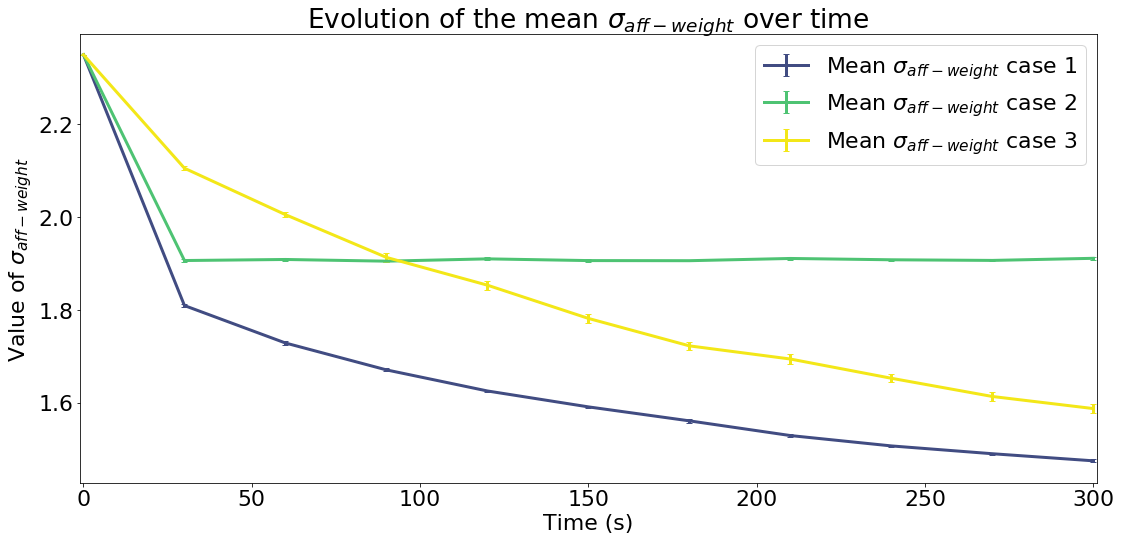

In [113]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
conc_std_1 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_1, axis=0)))
conc_std_2 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_2, axis=0)))
conc_std_3 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_3, axis=0)))

conc_std_1_std = np.concatenate(([0], stats.sem(all_mean_sigmas_case_1, axis=0)))
conc_std_2_std = np.concatenate(([0], stats.sem(all_mean_sigmas_case_2, axis=0)))
conc_std_3_std = np.concatenate(([0], stats.sem(all_mean_sigmas_case_3, axis=0)))


i = \
ax1.errorbar(np.arange(conc_std_1.size) * hardcoded_t_record, conc_std_1, conc_std_1_std, label='Mean $\sigma_{aff-weight}$ case 1',
            color='#414C82', linewidth=3)
ax1.errorbar(np.arange(conc_std_2.size) * hardcoded_t_record, conc_std_2, conc_std_2_std, label='Mean $\sigma_{aff-weight}$ case 2',
            color='#4EC373', linewidth=3)
ax1.errorbar(np.arange(conc_std_3.size) * hardcoded_t_record, conc_std_3, conc_std_3_std, label='Mean $\sigma_{aff-weight}$ case 3',
            color='#f3e718', linewidth=3)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
# ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
# ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )



ax1.grid(visible=False)
ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
# ax1.set_ylim([0, np.max([conc_std_1, conc_std_2, conc_std_3]) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $\sigma_{aff-weight}$")

# ax1.scatter(0, hardcoded_init_mean_std, marker='x', c='r', label="Initial mean $\sigma_{aff}$ in the original, non-lesioned case")
# ax1.scatter(conc_std_1.size* hardcoded_t_record//2, 1.42, c='r', label="Final mean $\sigma_{aff}$ in the original, non-lesioned case")
# ax1.set_ylim([0, 2.6])
ax1.set_xlim([-1, 301])

ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("mean_std_evo_with_errorbars_gi.png")

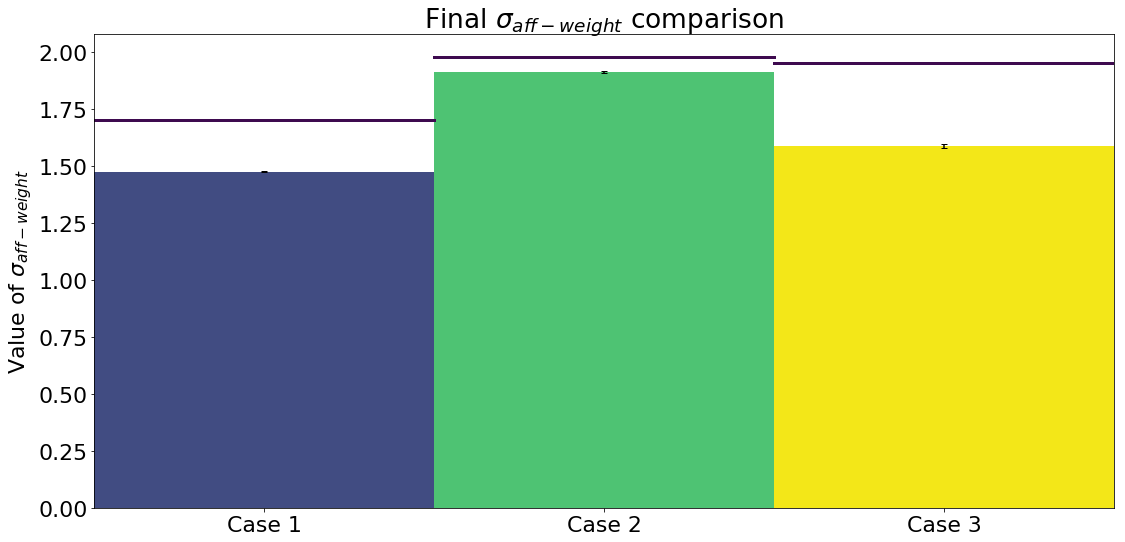

In [124]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)  
ax1.bar(0, np.mean(all_mean_sigmas_case_1, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_sigmas_case_1, axis=0)[-1],
            color='#414C82',
            linewidth=3, 
           label='Case 1')
ax1.bar(1, np.mean(all_mean_sigmas_case_2, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_sigmas_case_2, axis=0)[-1],
            color='#4EC373',
            linewidth=3, 
           label='Case 2')
ax1.bar(2, np.mean(all_mean_sigmas_case_3, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_sigmas_case_3, axis=0)[-1],
            color='#f3e718',
            linewidth=3, 
           label='Case 3')
        
ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
# ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $\sigma_{aff-weight}$")

ax1.set_title("Final $\sigma_{aff-weight}$ comparison")

ax1.set_xticks(range(3))
ax1.set_xticklabels(['Case 1','Case 2','Case 3'])
start = np.asarray([-.5, .5])
ax1.plot(start, [1.7]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.plot(start+1, [1.98]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.plot(start+2, [1.95]*2,
            linewidth=3,
            color='#3E0A4F')


ax1.set_xlim([-.5, 2.5])
# ax1.legend(loc='best')

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("result_comparison_std_barchart.png", dpi=600)
plt.savefig("result_comparison_std_barchart.eps")
plt.show()

0.769815025677 0.00619991188174


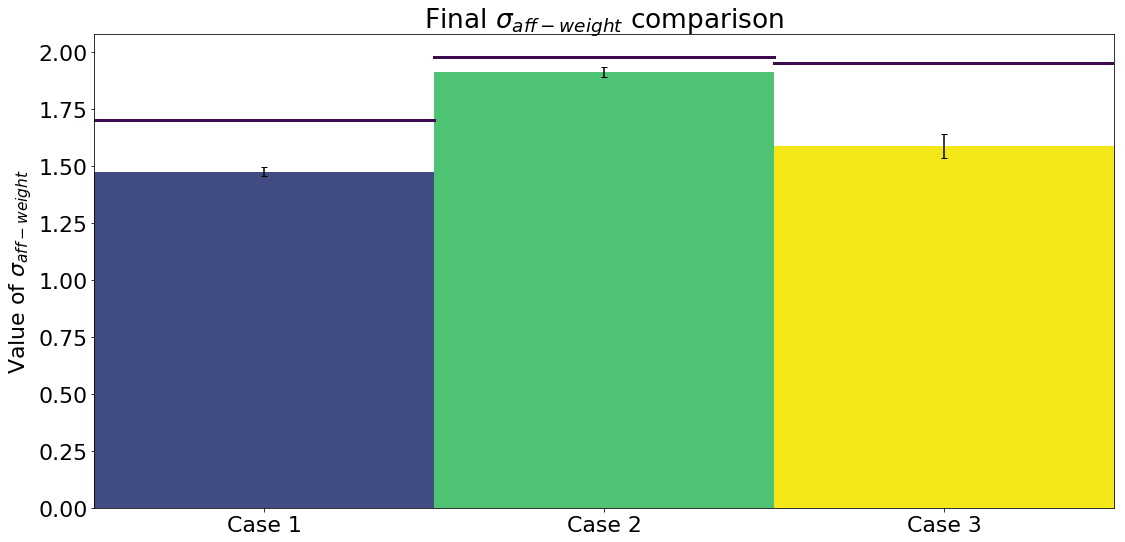

In [125]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)  
# (len(sigma_stims), len(lesion_types), len(input_types)
print conc_std_1[-1], conc_std_1_std[-1]
ax1.bar(0, np.mean(all_mean_sigmas_case_1, axis=0)[-1], 
            width=1,
             yerr=2*np.std(all_mean_sigmas_case_1, axis=0)[-1],
            color='#414C82',
            linewidth=3, 
           label='Case 1')
ax1.bar(1, np.mean(all_mean_sigmas_case_2, axis=0)[-1], 
            width=1,
             yerr=2*np.std(all_mean_sigmas_case_2, axis=0)[-1],
            color='#4EC373',
            linewidth=3, 
           label='Case 2')
ax1.bar(2, np.mean(all_mean_sigmas_case_3, axis=0)[-1], 
            width=1,
             yerr=2*np.std(all_mean_sigmas_case_3, axis=0)[-1],
            color='#f3e718',
            linewidth=3, 
           label='Case 3')
        
ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
# ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $\sigma_{aff-weight}$")

ax1.set_title("Final $\sigma_{aff-weight}$ comparison")

ax1.set_xticks(range(3))
ax1.set_xticklabels(['Case 1','Case 2','Case 3'])
start = np.asarray([-.5, .5])
ax1.plot(start, [1.7]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.plot(start+1, [1.98]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.plot(start+2, [1.95]*2,
            linewidth=3,
            color='#3E0A4F')


ax1.set_xlim([-.5, 2.5])
# ax1.legend(loc='best')

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("result_comparison_std_2std_barchart.png", dpi=600)
plt.savefig("result_comparison_std_2std_barchart.eps")
plt.show()

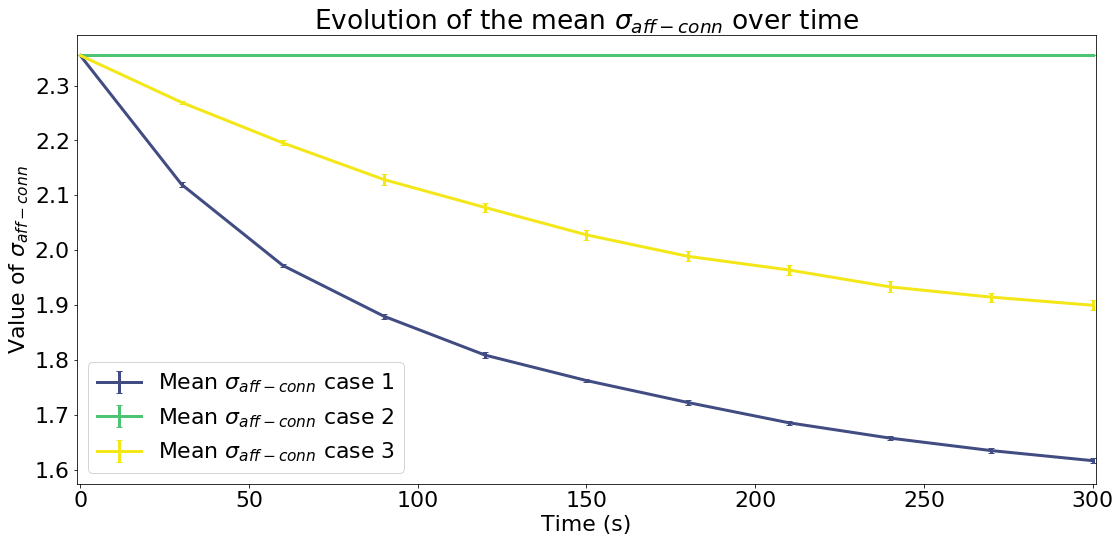

In [116]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)

init = [np.mean(all_mean_sigmas_conn_case_2, axis=0)[0]]

conc_std_1 = np.concatenate((init, np.mean(all_mean_sigmas_conn_case_1, axis=0)))
conc_std_2 = np.concatenate((init, np.mean(all_mean_sigmas_conn_case_2, axis=0)))
conc_std_3 = np.concatenate((init, np.mean(all_mean_sigmas_conn_case_3, axis=0)))

conc_std_1_std = np.concatenate(([0], stats.sem(all_mean_sigmas_conn_case_1, axis=0)))
conc_std_2_std = np.concatenate(([0], stats.sem(all_mean_sigmas_conn_case_2, axis=0)))
conc_std_3_std = np.concatenate(([0], stats.sem(all_mean_sigmas_conn_case_3, axis=0)))


i = \
ax1.errorbar(np.arange(conc_std_1.size) * hardcoded_t_record, conc_std_1, conc_std_1_std, label='Mean $\sigma_{aff-conn}$ case 1',
            color='#414C82', linewidth=3)
ax1.errorbar(np.arange(conc_std_2.size) * hardcoded_t_record, conc_std_2, conc_std_2_std, label='Mean $\sigma_{aff-conn}$ case 2',
            color='#4EC373', linewidth=3)
ax1.errorbar(np.arange(conc_std_3.size) * hardcoded_t_record, conc_std_3, conc_std_3_std, label='Mean $\sigma_{aff-conn}$ case 3',
            color='#f3e718', linewidth=3)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
# ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
# ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )



ax1.grid(visible=False)
ax1.set_title("Evolution of the mean $\sigma_{aff-conn}$ over time")
# ax1.set_ylim([0, np.max([conc_std_1, conc_std_2, conc_std_3]) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $\sigma_{aff-conn}$")

# ax1.scatter(0, hardcoded_init_mean_std, marker='x', c='r', label="Initial mean $\sigma_{aff_conn}$ in the original, non-lesioned case")
# ax1.scatter(conc_std_1.size* hardcoded_t_record//2, 1.42, c='r', label="Final mean $\sigma_{aff}$ in the original, non-lesioned case")
# ax1.set_ylim([0, 2.6])
ax1.set_xlim([-1, 301])

ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("mean_std_conn_evo_with_errorbars_gi.png")

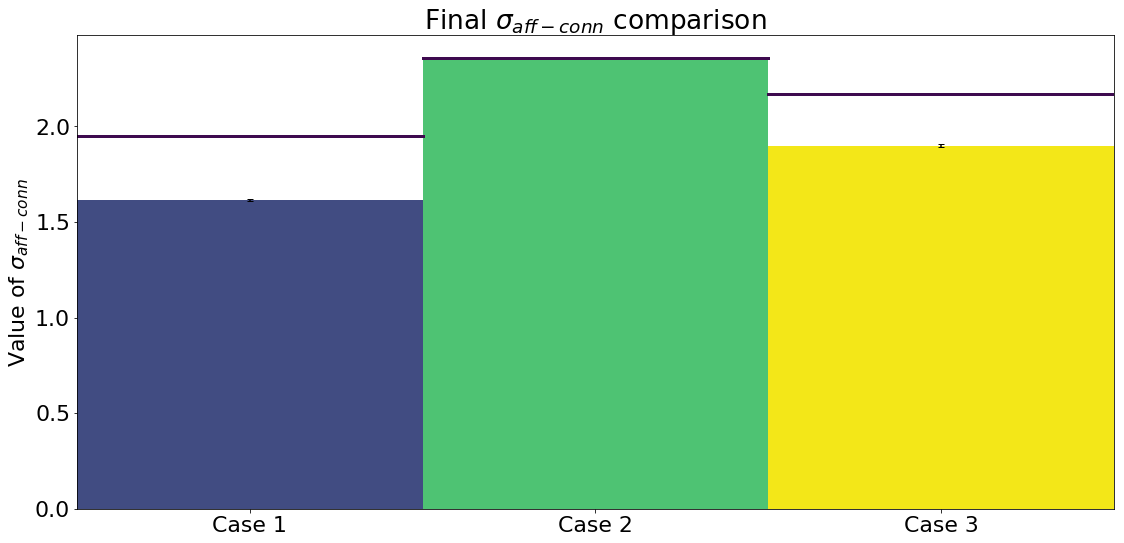

In [117]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)  
ax1.bar(0, np.mean(all_mean_sigmas_conn_case_1, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_sigmas_conn_case_1, axis=0)[-1],
            color='#414C82',
            linewidth=3, 
           label='Case 1')
ax1.bar(1, np.mean(all_mean_sigmas_conn_case_2, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_sigmas_conn_case_2, axis=0)[-1],
            color='#4EC373',
            linewidth=3, 
           label='Case 2')
ax1.bar(2, np.mean(all_mean_sigmas_conn_case_3, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_sigmas_conn_case_3, axis=0)[-1],
            color='#f3e718',
            linewidth=3, 
           label='Case 3')
        
ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
# ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $\sigma_{aff-conn}$")

ax1.set_title("Final $\sigma_{aff-conn}$ comparison")

ax1.set_xticks(range(3))
ax1.set_xticklabels(['Case 1','Case 2','Case 3'])
start = np.asarray([-.5, .5])
ax1.plot(start, [1.95]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.plot(start+1, [2.36]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.plot(start+2, [2.17]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.set_xlim([-.5, 2.5])

# ax1.set_ylim([0, 3.0])
# ax1.legend(loc='best')

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("result_comparison_std_conn_barchart.png", dpi=600)
plt.savefig("result_comparison_std_conn_barchart.eps")
plt.show()

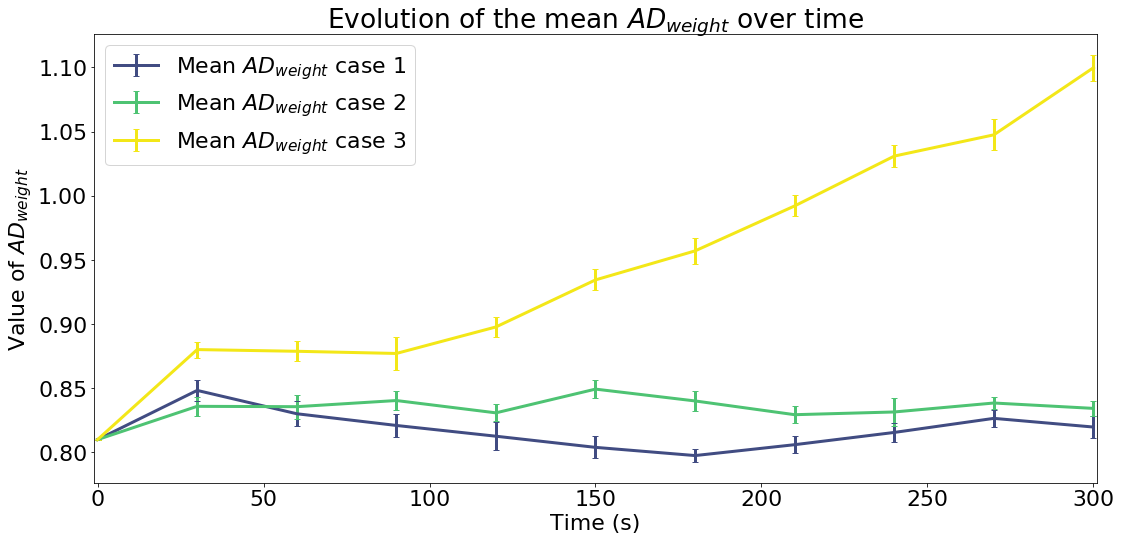

In [118]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
conc_std_1 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_case_1, axis=0)))
conc_std_2 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_case_2, axis=0)))
conc_std_3 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_case_3, axis=0)))

conc_std_1_std = np.concatenate(([0], stats.sem(all_mean_ads_case_1, axis=0)))
conc_std_2_std = np.concatenate(([0], stats.sem(all_mean_ads_case_2, axis=0)))
conc_std_3_std = np.concatenate(([0], stats.sem(all_mean_ads_case_3, axis=0)))


i = \
ax1.errorbar(np.arange(conc_std_1.size) * hardcoded_t_record, conc_std_1, conc_std_1_std, label='Mean $AD_{weight}$ case 1',
            color='#414C82', linewidth=3)
ax1.errorbar(np.arange(conc_std_2.size) * hardcoded_t_record, conc_std_2, conc_std_2_std, label='Mean $AD_{weight}$ case 2',
            color='#4EC373', linewidth=3)
ax1.errorbar(np.arange(conc_std_3.size) * hardcoded_t_record, conc_std_3, conc_std_3_std, label='Mean $AD_{weight}$ case 3',
            color='#f3e718', linewidth=3)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
# ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
# ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )



ax1.grid(visible=False)
ax1.set_title("Evolution of the mean $AD_{weight}$ over time")
# ax1.set_ylim([0, np.max([conc_std_1, conc_std_2, conc_std_3]) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $AD_{weight}$")

# ax1.set_yscale("symlog", linthreshy=.0001)

# ax1.get_yaxis().set_major_formatter(mlib.ticker.ScalarFormatter())
# ax1.set_yticks(np.linspace(.5,1.0,3))

ax1.set_xlim([-1, 301])

ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("mean_ad_evo_with_errorbars_gi.png")

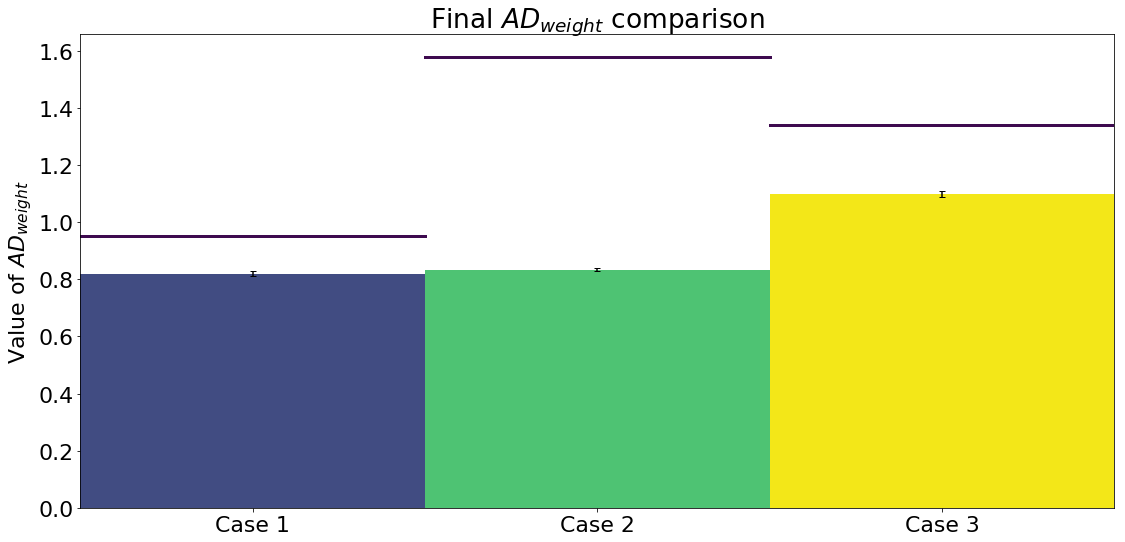

In [119]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)  
ax1.bar(0, np.mean(all_mean_ads_case_1, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_ads_case_1, axis=0)[-1],
            color='#414C82',
            linewidth=3, 
           label='Case 1')
ax1.bar(1, np.mean(all_mean_ads_case_2, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_ads_case_2, axis=0)[-1],
            color='#4EC373',
            linewidth=3, 
           label='Case 2')
ax1.bar(2, np.mean(all_mean_ads_case_3, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_ads_case_3, axis=0)[-1],
            color='#f3e718',
            linewidth=3, 
           label='Case 3')
        
ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
# ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $AD_{weight}$")

ax1.set_title("Final $AD_{weight}$ comparison")

ax1.set_xticks(range(3))
ax1.set_xticklabels(['Case 1','Case 2','Case 3'])
start = np.asarray([-.5, .5])
ax1.plot(start, [0.95]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.plot(start+1, [1.58]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.plot(start+2, [1.34]*2,
            linewidth=3,
            color='#3E0A4F')


ax1.set_xlim([-.5, 2.5])
# ax1.legend(loc='best')

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("result_comparison_ad_barchart.png", dpi=600)
plt.savefig("result_comparison_ad_barchart.eps")
plt.show()

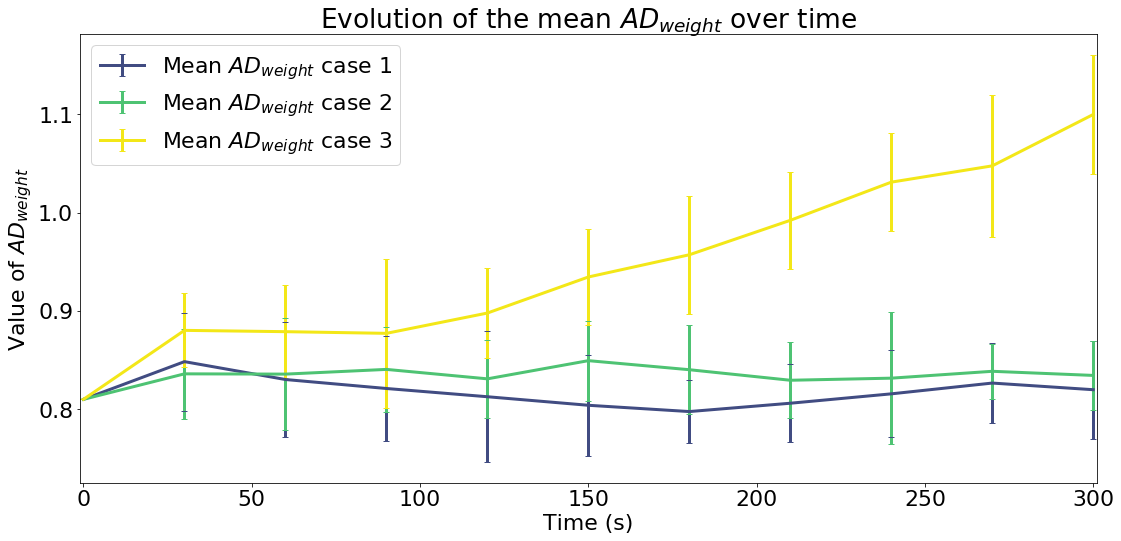

In [120]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
conc_std_1 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_case_1, axis=0)))
conc_std_2 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_case_2, axis=0)))
conc_std_3 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_case_3, axis=0)))

conc_std_1_std = np.concatenate(([0], 2*np.std(all_mean_ads_case_1, axis=0)))
conc_std_2_std = np.concatenate(([0], 2*np.std(all_mean_ads_case_2, axis=0)))
conc_std_3_std = np.concatenate(([0], 2*np.std(all_mean_ads_case_3, axis=0)))


i = \
ax1.errorbar(np.arange(conc_std_1.size) * hardcoded_t_record, conc_std_1, conc_std_1_std, label='Mean $AD_{weight}$ case 1',
            color='#414C82', linewidth=3)
ax1.errorbar(np.arange(conc_std_2.size) * hardcoded_t_record, conc_std_2, conc_std_2_std, label='Mean $AD_{weight}$ case 2',
            color='#4EC373', linewidth=3)
ax1.errorbar(np.arange(conc_std_3.size) * hardcoded_t_record, conc_std_3, conc_std_3_std, label='Mean $AD_{weight}$ case 3',
            color='#f3e718', linewidth=3)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
# ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
# ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )



ax1.grid(visible=False)
ax1.set_title("Evolution of the mean $AD_{weight}$ over time")
# ax1.set_ylim([0, np.max([conc_std_1, conc_std_2, conc_std_3]) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $AD_{weight}$")

# ax1.scatter(0, hardcoded_init_mean_std, marker='x', c='r', label="Initial mean $\sigma_{aff}$ in the original, non-lesioned case")
# ax1.scatter(conc_std_1.size* hardcoded_t_record//2, 1.42, c='r', label="Final mean $\sigma_{aff}$ in the original, non-lesioned case")
# ax1.set_ylim([0, 1.2])

ax1.set_xlim([-1, 301])
ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("mean_ad_evo_with_errorbars_gi_95cent.png")

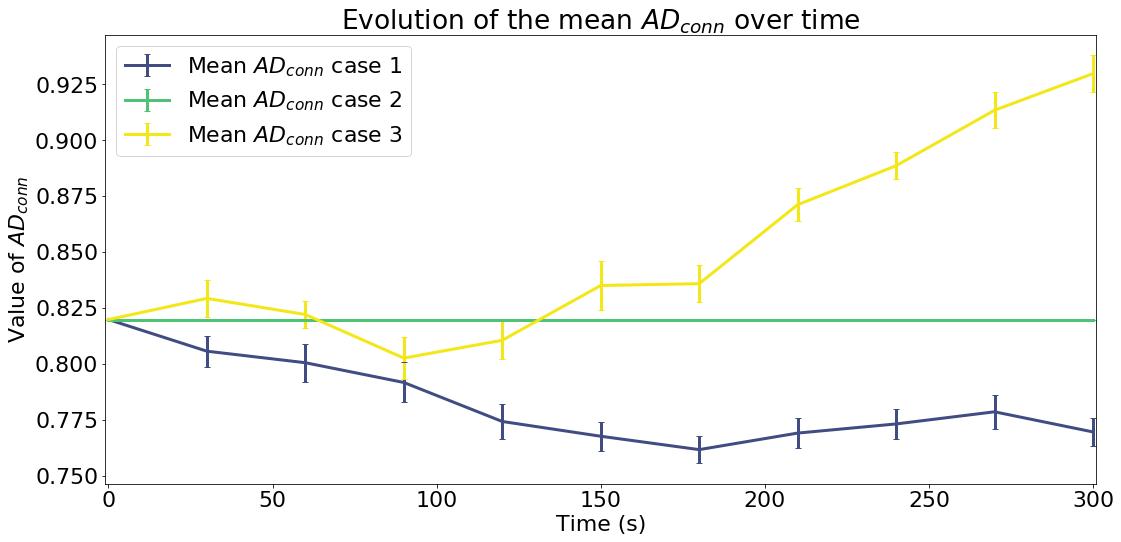

In [121]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
init = [np.mean(all_mean_ads_conn_case_2, axis=0)[0]]
conc_std_1 = np.concatenate((init, np.mean(all_mean_ads_conn_case_1, axis=0)))
conc_std_2 = np.concatenate((init, np.mean(all_mean_ads_conn_case_2, axis=0)))
conc_std_3 = np.concatenate((init, np.mean(all_mean_ads_conn_case_3, axis=0)))

conc_std_1_std = np.concatenate(([0], stats.sem(all_mean_ads_conn_case_1, axis=0)))
conc_std_2_std = np.concatenate(([0], stats.sem(all_mean_ads_conn_case_2, axis=0)))
conc_std_3_std = np.concatenate(([0], stats.sem(all_mean_ads_conn_case_3, axis=0)))


i = \
ax1.errorbar(np.arange(conc_std_1.size) * hardcoded_t_record, conc_std_1, conc_std_1_std, label='Mean $AD_{conn}$ case 1',
            color='#414C82', linewidth=3)
ax1.errorbar(np.arange(conc_std_2.size) * hardcoded_t_record, conc_std_2, conc_std_2_std, label='Mean $AD_{conn}$ case 2',
            color='#4EC373', linewidth=3)
ax1.errorbar(np.arange(conc_std_3.size) * hardcoded_t_record, conc_std_3, conc_std_3_std, label='Mean $AD_{conn}$ case 3',
            color='#f3e718', linewidth=3)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
# ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
# ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )



ax1.grid(visible=False)
ax1.set_title("Evolution of the mean $AD_{conn}$ over time")
# ax1.set_ylim([0, np.max([conc_std_1, conc_std_2, conc_std_3]) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $AD_{conn}$")

# ax1.scatter(0, hardcoded_init_mean_std, marker='x', c='r', label="Initial mean $\sigma_{aff}$ in the original, non-lesioned case")
# ax1.scatter(conc_std_1.size* hardcoded_t_record//2, 1.42, c='r', label="Final mean $\sigma_{aff}$ in the original, non-lesioned case")
# ax1.set_ylim([0, 1.2])
ax1.set_xlim([-1, 301])

ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("mean_ad_conn_evo_with_errorbars_gi.png")

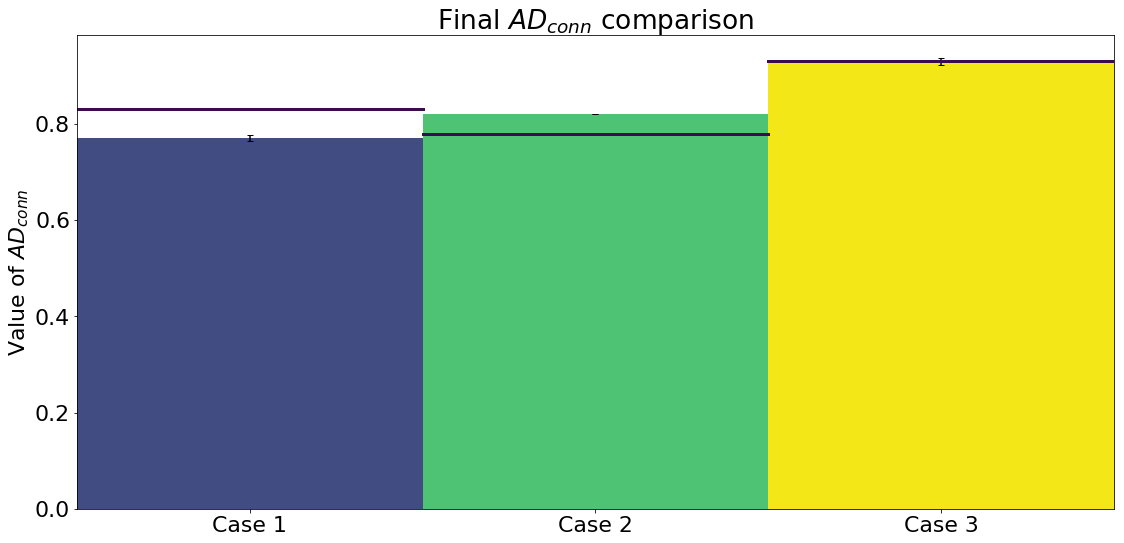

In [122]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)  
ax1.bar(0, np.mean(all_mean_ads_conn_case_1, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_ads_conn_case_1, axis=0)[-1],
            color='#414C82',
            linewidth=3, 
           label='Case 1')
ax1.bar(1, np.mean(all_mean_ads_conn_case_2, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_ads_conn_case_2, axis=0)[-1],
            color='#4EC373',
            linewidth=3, 
           label='Case 2')
ax1.bar(2, np.mean(all_mean_ads_conn_case_3, axis=0)[-1], 
            width=1,
             yerr=stats.sem(all_mean_ads_conn_case_3, axis=0)[-1],
            color='#f3e718',
            linewidth=3, 
           label='Case 3')
        
ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
# ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $AD_{conn}$")

ax1.set_title("Final $AD_{conn}$ comparison")

ax1.set_xticks(range(3))
ax1.set_xticklabels(['Case 1','Case 2','Case 3'])
start = np.asarray([-.5, .5])
ax1.plot(start, [0.83]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.plot(start+1, [0.78]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.plot(start+2, [0.93]*2,
            linewidth=3,
            color='#3E0A4F')
ax1.set_xlim([-.5, 2.5])

# ax1.set_ylim([0, 3.0])
# ax1.legend(loc='best')

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("result_comparison_ad_conn_barchart.png", dpi=600)
plt.savefig("result_comparison_ad_conn_barchart.eps")
plt.show()

# Let's report some average numbers

In [23]:
rates_case_1 = results[0:10, 0]
rates_case_2 = results[10:20, 0]
rates_case_3 = results[20:30, 0]

final_number_of_syn_case_1 = results[0:10, 1]
final_number_of_syn_case_2 = results[10:20, 1]
final_number_of_syn_case_3 = results[20:30, 1]

weight_proportion_case_1 = results[0:10, 2]
weight_proportion_case_2 = results[10:20, 2]
weight_proportion_case_3 = results[20:30, 2]

p_sigma_aff_conn_case_1 = results[0:10, 6]
p_sigma_aff_conn_case_2 = results[10:20, 6]
p_sigma_aff_conn_case_3 = results[20:30, 6]

p_sigma_aff_weight_case_1 = results[0:10, 9]
p_sigma_aff_weight_case_2 = results[10:20, 9]
p_sigma_aff_weight_case_3 = results[20:30, 9]

p_ad_conn_case_1 = results[0:10, 13]
p_ad_conn_case_2 = results[10:20, 13]
p_ad_conn_case_3 = results[20:30, 13]

p_ad_weight_case_1 = results[0:10, 16]
p_ad_weight_case_2 = results[10:20, 16]
p_ad_weight_case_3 = results[20:30, 16]

In [24]:
print "rates"
print np.mean(rates_case_1), stats.scoreatpercentile(rates_case_1, 95)
print np.mean(rates_case_2), stats.scoreatpercentile(rates_case_2, 95)
print np.mean(rates_case_3), stats.scoreatpercentile(rates_case_3, 95) 

rates
21.1355716146 21.2310944011
20.0807877604 20.1449492187
9.37506640625 9.48626171875


In [25]:
print "final_number_of_syn"
print np.mean(final_number_of_syn_case_1), stats.scoreatpercentile(final_number_of_syn_case_1, 95)
print np.mean(final_number_of_syn_case_2), stats.scoreatpercentile(final_number_of_syn_case_2, 95)
print np.mean(final_number_of_syn_case_3), stats.scoreatpercentile(final_number_of_syn_case_3, 95) 

final_number_of_syn
15.8015625 15.9845703125
16.0 16.0
11.897265625 12.05234375


In [26]:
print "weight_proportion"
print np.mean(weight_proportion_case_1), stats.scoreatpercentile(weight_proportion_case_1, 95)
print np.mean(weight_proportion_case_2), stats.scoreatpercentile(weight_proportion_case_2, 95)
print np.mean(weight_proportion_case_3), stats.scoreatpercentile(weight_proportion_case_3, 95) 

weight_proportion
0.828067183224 0.838854271955
0.709332168102 0.723161369562
0.607832549803 0.622256648146


In [27]:
print "p_ad_conn"
print "case 1 --",np.mean(p_ad_conn_case_1<0.05) * 100, "%" , stats.scoreatpercentile(p_ad_conn_case_1, 95)
# print np.mean(p_ad_conn_case_2<0.05) * 100, "%" , stats.scoreatpercentile(p_ad_conn_case_2, 95)
print "case 3 --",np.mean(p_ad_conn_case_3<0.05) * 100, "%" , stats.scoreatpercentile(p_ad_conn_case_3, 95)

p_ad_conn
case 1 -- 10.0 % 0.480281685054
case 3 -- 0.0 % 0.69163492977


In [28]:
print "p_ad_weight"
print "case 1 --",np.mean(p_ad_weight_case_1<0.05) * 100, "%" , stats.scoreatpercentile(p_ad_weight_case_1, 95)
print "case 2 --",np.mean(p_ad_weight_case_2<0.05) * 100, "%" , stats.scoreatpercentile(p_ad_weight_case_2, 95)
print "case 3 --",np.mean(p_ad_weight_case_3<0.05) * 100, "%" , stats.scoreatpercentile(p_ad_weight_case_3, 95)

p_ad_weight
case 1 -- 50.0 % 0.586598678511
case 2 -- 70.0 % 0.189788101393
case 3 -- 10.0 % 0.849346251479


In [29]:
print "p_sigma_aff_conn"
print "case 1 --",np.mean(p_sigma_aff_conn_case_1<0.05) * 100, "%" , stats.scoreatpercentile(p_sigma_aff_conn_case_1, 95)
# print np.mean(p_sigma_aff_conn_case_2<0.05) * 100, "%" , stats.scoreatpercentile(p_sigma_aff_conn_case_2, 95)
print "case 3 --",np.mean(p_sigma_aff_conn_case_3<0.05) * 100, "%" , stats.scoreatpercentile(p_sigma_aff_conn_case_3, 95)

p_sigma_aff_conn
case 1 -- 100.0 % 4.24289202912e-42
case 3 -- 100.0 % 6.52508403983e-15


In [30]:
print "p_sigma_aff_weight"
print "case 1 --",np.mean(p_sigma_aff_weight_case_1<0.05) * 100, "%" , stats.scoreatpercentile(p_sigma_aff_weight_case_1, 95)
print "case 2 --",np.mean(p_sigma_aff_weight_case_2<0.05) * 100, "%" , stats.scoreatpercentile(p_sigma_aff_weight_case_2, 95)
print "case 3 --",np.mean(p_sigma_aff_weight_case_3<0.05) * 100, "%" , stats.scoreatpercentile(p_sigma_aff_weight_case_3, 95)

p_sigma_aff_weight
case 1 -- 100.0 % 1.97177599148e-32
case 2 -- 100.0 % 2.86099086389e-43
case 3 -- 100.0 % 2.18620835771e-17


# Barchart comparison to Sim's results